This file will conduct sentiment analysis on the dataset using VADER and then provide word clouds on the positive and negative reviews. 

Importing Neccessary **Libraries**

In [27]:
import nltk 
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords



**Download** the **VADER Lexicon**

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MasonLonoff\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

**Initialize** Sentiment Intensity Analyzer

In [3]:
sid = SentimentIntensityAnalyzer()

**Reading In** the Dataset

In [4]:
df = pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Check out the Values for the **Sentiment** Column

In [5]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Checking for **Nulls**

In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

Checking for **Blanks**

In [7]:
blanks = []
for i, rv, ln in df.itertuples():
    if type(rv) == str:
        if rv.isspace():
            blanks.append(i)

Dropping the **Blanks** if Needed

In [8]:
df.drop(blanks, inplace=True)

Creating the **Scores** Column

In [9]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

Let's Examine the DF Now

In [10]:
df.head()

,review,sentiment,scores
0,One of the other reviewers has mentioned that ...,positive,"{'neg': 0.203, 'neu': 0.748, 'pos': 0.048, 'co..."
1,A wonderful little production. <br /><br />The...,positive,"{'neg': 0.053, 'neu': 0.776, 'pos': 0.172, 'co..."
2,I thought this was a wonderful way to spend ti...,positive,"{'neg': 0.094, 'neu': 0.714, 'pos': 0.192, 'co..."
3,Basically there's a family where a little boy ...,negative,"{'neg': 0.138, 'neu': 0.797, 'pos': 0.065, 'co..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"{'neg': 0.052, 'neu': 0.801, 'pos': 0.147, 'co..."


Pulling out the **Compound** Score

In [11]:
df['compound'] = df['scores'].apply(lambda d:d['compound'])

Examining the DF Now

In [12]:
df.head()

,review,sentiment,scores,compound
0,One of the other reviewers has mentioned that ...,positive,"{'neg': 0.203, 'neu': 0.748, 'pos': 0.048, 'co...",-0.9951
1,A wonderful little production. <br /><br />The...,positive,"{'neg': 0.053, 'neu': 0.776, 'pos': 0.172, 'co...",0.9641
2,I thought this was a wonderful way to spend ti...,positive,"{'neg': 0.094, 'neu': 0.714, 'pos': 0.192, 'co...",0.9605
3,Basically there's a family where a little boy ...,negative,"{'neg': 0.138, 'neu': 0.797, 'pos': 0.065, 'co...",-0.9213
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"{'neg': 0.052, 'neu': 0.801, 'pos': 0.147, 'co...",0.9744


Adding the **Comp Score** Column 

In [13]:
df['comp_score'] = df['compound'].apply(lambda score: 'positive' if score >= 0 else 'negative')

In [14]:
df.head()

,review,sentiment,scores,compound,comp_score
0,One of the other reviewers has mentioned that ...,positive,"{'neg': 0.203, 'neu': 0.748, 'pos': 0.048, 'co...",-0.9951,negative
1,A wonderful little production. <br /><br />The...,positive,"{'neg': 0.053, 'neu': 0.776, 'pos': 0.172, 'co...",0.9641,positive
2,I thought this was a wonderful way to spend ti...,positive,"{'neg': 0.094, 'neu': 0.714, 'pos': 0.192, 'co...",0.9605,positive
3,Basically there's a family where a little boy ...,negative,"{'neg': 0.138, 'neu': 0.797, 'pos': 0.065, 'co...",-0.9213,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"{'neg': 0.052, 'neu': 0.801, 'pos': 0.147, 'co...",0.9744,positive


Calculating our **Accuracies**

In [15]:
accuracy_score(df['sentiment'], df['comp_score'])

0.69626

In [16]:
print(classification_report(df['sentiment'], df['comp_score']))

              precision    recall  f1-score   support

    negative       0.79      0.54      0.64     25000
    positive       0.65      0.86      0.74     25000

    accuracy                           0.70     50000
   macro avg       0.72      0.70      0.69     50000
weighted avg       0.72      0.70      0.69     50000



In [17]:
confusion_matrix(df['sentiment'], df['comp_score'])

array([[13410, 11590],
       [ 3597, 21403]], dtype=int64)

Let's take a look at **Word Clouds** for the **positive** and **negative** reviews

**Separating** the reviews into **Positive** and **Negative** dataframes

In [19]:
positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']

**Tokenizing** the reviews into **individual words**

In [20]:

positive_tokens = [word_tokenize(review) for review in positive_reviews['review']]
negative_tokens = [word_tokenize(review) for review in negative_reviews['review']]

**Counting Frequency** of each word 

In [35]:
my_stopwords = {'""', "'", '<', '/', '.', '(', 'br', '>', ')', '`', ',', '!', ':', "''", '?'}  # Your own set of stopwords

# Get the commonly imported English stopwords from NLTK
nltk_stopwords = set(stopwords.words('english'))

# Combine your stopwords and NLTK stopwords
combined_stopwords = my_stopwords.union(nltk_stopwords)

positive_word_freq = FreqDist([word for tokens in positive_tokens for word in tokens if word.lower() not in combined_stopwords])
negative_word_freq = FreqDist([word for tokens in negative_tokens for word in tokens if word.lower() not in combined_stopwords])


**Generating** the **Word Clouds**

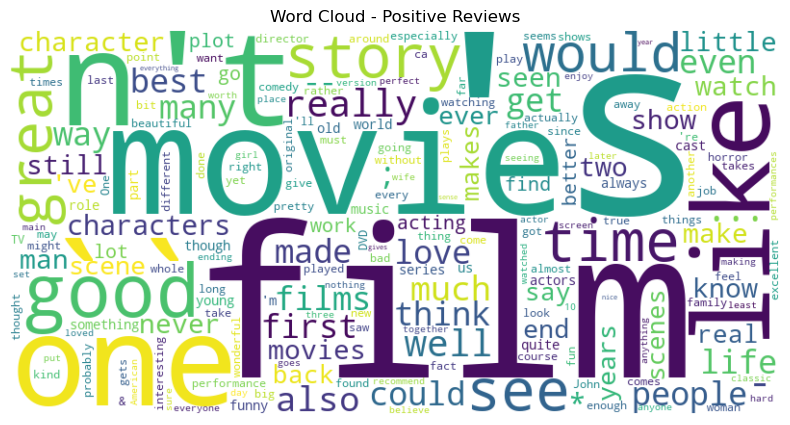

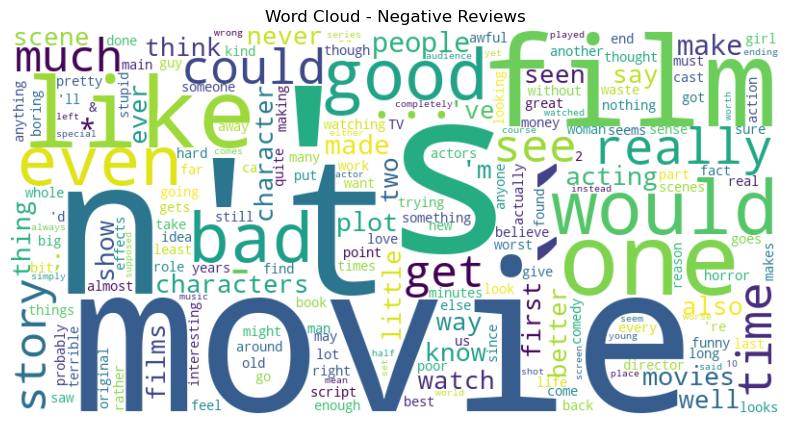

In [36]:
# Word cloud for positive reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews')
plt.axis('off')

# Word cloud for negative reviews
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews')
plt.axis('off');
